# Investigate Hotel Business using Data Visualization


In [2]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hotel_bookings_data.csv')
dfc = df.copy()

In [4]:
dfc.iloc[:,:15].sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment
42524,City Hotel,0,55,2017,November,37,6,2,0,2,0.0,0,Breakfast,Kota Batu,Groups
58368,City Hotel,1,104,2018,December,42,11,2,5,2,0.0,0,Breakfast,Kabupaten Sumedang,Online TA
40057,Resort Hotel,0,204,2019,October,35,29,4,10,2,0.0,0,Breakfast,Kota Malang,Direct
30584,Resort Hotel,0,1,2018,January,48,25,0,2,1,0.0,0,Breakfast,Kota Denpasar,Direct
69563,City Hotel,1,189,2019,August,22,2,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups


In [5]:
dfc.iloc[:,16:].sample(5)

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
50538,0,0,0,1,No Deposit,3.0,NaN,0,Family,96.00,0,0,Canceled
58126,0,0,0,0,No Deposit,9.0,NaN,0,Personal,125.55,0,0,Canceled
116468,0,0,0,0,No Deposit,9.0,NaN,0,Personal,140.00,0,0,Check-Out
33855,0,0,0,0,No Deposit,NaN,223.0,0,Family,47.00,0,0,Check-Out
116011,0,0,0,1,No Deposit,9.0,NaN,0,Personal,198.00,0,1,Check-Out


## Data Exploration

In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#Grouping columns based on their data types
cats = ['hotel', 'arrival_date_month','meal','city','market_segment','distribution_channel','deposit_type','customer_type','reservation_status'] #categorical
nums = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_weekdays_nights','adults','children','babies','is_repeated_guest',
        'previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','company','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests'] #numerical


In [8]:
#Viewing values in categorical data columns
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(dfc[col].value_counts())
    print()

Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count kolom arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

Value count kolom meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Value count kolom city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value count kolom mark

### Descriptive Statistics

In [9]:
dfc[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
dfc[cats].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


### Checking Null Values

In [11]:
dfc.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [12]:
# Percentage of null values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

#### Summary of Null Values in Columns

There are 4 columns with null values in the dataset:

1. **Children** Column: Contains null values in 4 rows, which is 0.003% of the total data.
2. **City** Column: Contains null values in 488 rows, which is 0.408% of the total data.
3. **Agent** Column: Contains null values in 16,340 rows, which is 13.686% of the total data.
4. **Company** Column: Contains null values in 112,593 rows, which is 94.307% of the total data.


### Checking Duplicated Data

In [13]:
dfc.duplicated().sum()

33261

There are 33,261 duplicated rows present in the dataset

In [14]:
dfc.shape

(119390, 29)

# Task 1 - Data Preprocessing:
1. **Handling Null Data** (Hint: Pay attention to the number of null data and the type of each column, to choose the appropriate method.)
2. **Replacing Inappropriate Values** (Hint: Focus on the "meal" column)
3. **Removing Unnecessary Data** (Hint: Consider the total number of guests for each reservation)


## Data Cleansing

In [15]:
df_clean = dfc.copy()

### 1. Handling Null Values

In [16]:
# Imputing null values in columns 'children', 'company', and 'agent' with zero
df_clean['children'].fillna(0, inplace=True)
df_clean['company'].fillna(0, inplace=True)
df_clean['agent'].fillna(0, inplace=True)

# Imputing null values in column 'city' with 'unknown'
df_clean['city'].fillna('unknown', inplace=True)


In [17]:
# Checking null values after imputing
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### 2. Handling values that are not appropriate

In [18]:
df_clean.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [19]:
# Replacing 'undefined' values with appropriate values
df_clean['meal'].replace('Undefined', 'No Meal', inplace=True)

In [20]:
df_clean.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

### 3. Removing Rows with Uneccessary Information

In [21]:
# Calculate the total number of guests for each reservation
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

In [22]:
# Identify rows where adults, children, and babies are all 0
no_guest_rows = df_clean[(df_clean['adults'] == 0) & (df_clean['children'] == 0) & (df_clean['babies'] == 0)]

# Identify rows where adults are 0 but children or babies are greater than 0
invalid_rows = df_clean[(df_clean['adults'] == 0) & ((df_clean['children'] > 0) | (df_clean['babies'] > 0))]


In [23]:
# Identify rows where 'adr' is negative
negative_adr_rows = df_clean[df_clean['adr'] < 0]

In [24]:
# Combine the indices of all types of invalid rows
all_invalid_rows = pd.concat([negative_adr_rows, no_guest_rows, invalid_rows])

# Drop the invalid rows from the DataFrame
df_fix = df_clean.drop(all_invalid_rows.index)

In [25]:
df_fix.shape

(118986, 30)

In [26]:
df_fix.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
80437,City Hotel,1,34,2017,February,50,8,0,2,1,...,Non Refund,19.0,0.0,0,Personal,90.00,0,0,Canceled,1.0
92947,City Hotel,0,86,2019,March,2,8,1,0,1,...,No Deposit,0.0,40.0,0,Personal,67.00,1,0,Check-Out,1.0
26346,Resort Hotel,0,196,2018,September,30,19,2,9,2,...,No Deposit,240.0,0.0,0,Personal,194.73,1,1,Check-Out,2.0
42785,City Hotel,1,44,2017,November,37,10,0,2,2,...,Non Refund,41.0,0.0,0,Personal,126.00,0,0,Canceled,2.0
71716,City Hotel,1,184,2019,September,28,10,3,6,3,...,No Deposit,9.0,0.0,0,Personal,151.17,0,1,Canceled,3.0


# Task 2 - Monthly Hotel Booking Analysis Based on Hotel Type:
1. Create an aggregate table that illustrates the comparison of hotel bookings each month based on hotel type, taking into account the year of arrival. (Hint: Observe the year of arrival data)
2. Normalize the data. (Hint: Pay attention to September and October data)
3. Arrange the data in ascending order by month, considering the proper naming of months for ease of visualization.
4. Generate a plot that demonstrates the changes in hotel booking trends, showing both increases and decreases, for each month based on hotel type. (Hint: Consider using a suitable plot type)
5. Provide an interpretation of the plot's outcomes, considering Indonesian holidays.


In [27]:
df2 = df_fix.copy()

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118986 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118986 non-null  object 
 1   is_canceled                     118986 non-null  int64  
 2   lead_time                       118986 non-null  int64  
 3   arrival_date_year               118986 non-null  int64  
 4   arrival_date_month              118986 non-null  object 
 5   arrival_date_week_number        118986 non-null  int64  
 6   arrival_date_day_of_month       118986 non-null  int64  
 7   stays_in_weekend_nights         118986 non-null  int64  
 8   stays_in_weekdays_nights        118986 non-null  int64  
 9   adults                          118986 non-null  int64  
 10  children                        118986 non-null  float64
 11  babies                          118986 non-null  int64  
 12  meal            

### 1. Create an aggregated table

In [29]:
df_monthly = df.groupby(['hotel', 'arrival_date_month', 'arrival_date_year'])['hotel'].count().reset_index(name='total_bookings')
df_monthly

,hotel,arrival_date_month,arrival_date_year,total_bookings
0,City Hotel,April,2018,2371
1,City Hotel,April,2019,2594
2,City Hotel,August,2018,3923
3,City Hotel,August,2019,3971
4,City Hotel,December,2017,3386
5,City Hotel,December,2018,4219
6,City Hotel,February,2017,1654
7,City Hotel,February,2018,2478
8,City Hotel,January,2017,1235
9,City Hotel,January,2018,3122


In [30]:
# Calculate Unique Arrival Years for Hotel Bookings
booking_data = df2.groupby(["hotel","arrival_date_month"]).agg({"arrival_date_year":["nunique", "count"]}).reset_index()

booking_data.columns = ["hotel_type","arrival_month", "unique_years", "total_bookings"]
booking_data

,hotel_type,arrival_month,unique_years,total_bookings
0,City Hotel,April,2,4932
1,City Hotel,August,2,7873
2,City Hotel,December,2,7578
3,City Hotel,February,2,4091
4,City Hotel,January,2,4330
5,City Hotel,July,2,8205
6,City Hotel,June,2,7448
7,City Hotel,March,2,3712
8,City Hotel,May,2,6417
9,City Hotel,November,2,7381


### 2. Normalize the data

In [31]:
booking_data[booking_data["unique_years"] != 2]

,hotel_type,arrival_month,unique_years,total_bookings
10,City Hotel,October,3,8935
11,City Hotel,September,3,8038
22,Resort Hotel,October,3,4894
23,Resort Hotel,September,3,4573


In the provided dataset, the months of October and September have "unique_years" values of 3, indicating that bookings made in these months span three different years. Conversely, other months cover a time frame of only two years. This variation in the time span has the potential to introduce bias into the analysis. To address this potential bias, data normalization is implemented. Normalization involves computing the average number of bookings for each month. This computation is achieved by dividing the "total_bookings" values by their corresponding "unique_years" values. By adjusting the divisor based on the unique years associated with each month, we ensure an equitable and comparable assessment of average booking values. This normalization approach aims to provide an objective evaluation of booking trends across different months, contributing to a more accurate analysis.

In [32]:
booking_data['avg_booking'] =round(booking_data['total_bookings'] / booking_data['unique_years'])
booking_data

,hotel_type,arrival_month,unique_years,total_bookings,avg_booking
0,City Hotel,April,2,4932,2466.0
1,City Hotel,August,2,7873,3936.0
2,City Hotel,December,2,7578,3789.0
3,City Hotel,February,2,4091,2046.0
4,City Hotel,January,2,4330,2165.0
5,City Hotel,July,2,8205,4102.0
6,City Hotel,June,2,7448,3724.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6417,3208.0
9,City Hotel,November,2,7381,3690.0


### 3. Sort Data by Month

In [33]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Sorting the DataFrame
booking_data.sort_values(by=["hotel_type", "arrival_month"], inplace=True)

# Changing the data type of 'arrival_month' to Categorical with custom order
booking_data['arrival_month'] = pd.Categorical(booking_data['arrival_month'], 
                                          categories=month_order, 
                                          ordered=True)

# Resetting the index
booking_data.reset_index(drop=True, inplace=True)
booking_data

,hotel_type,arrival_month,unique_years,total_bookings,avg_booking
0,City Hotel,April,2,4932,2466.0
1,City Hotel,August,2,7873,3936.0
2,City Hotel,December,2,7578,3789.0
3,City Hotel,February,2,4091,2046.0
4,City Hotel,January,2,4330,2165.0
5,City Hotel,July,2,8205,4102.0
6,City Hotel,June,2,7448,3724.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6417,3208.0
9,City Hotel,November,2,7381,3690.0


### 4. Hotel Booking Trends Visualization

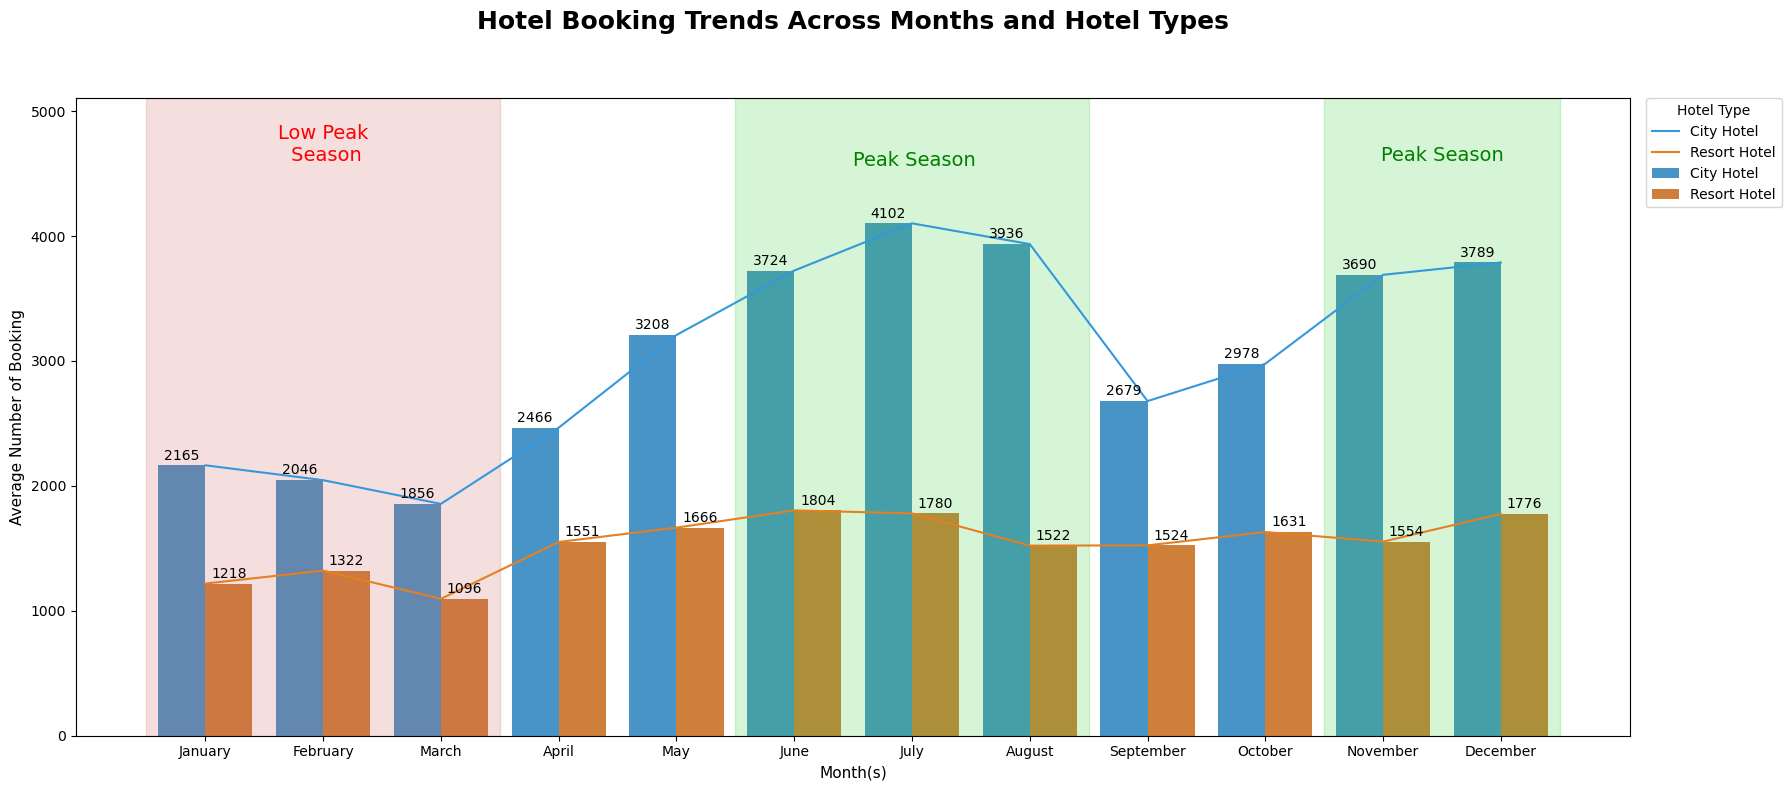

In [34]:
# Set figure & size
fig, ax = plt.subplots(figsize=(18, 8))

# Define color palette for different hotel types
color = ['#3498db', '#e67e22']

# Create bar plot and line plot using seaborn
sns.barplot(x='arrival_month', y ='avg_booking', 
            data=booking_data, hue='hotel_type', palette=color)

sns.lineplot(x='arrival_month', y ='avg_booking', 
             data=booking_data, hue='hotel_type', palette=color)

# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

# Create area plots for Peak Season and Low Peak Season
max_book = max(booking_data['avg_booking'])

plt.fill_between([-0.5, 2.5], 0, max_book+1000, color='indianred', alpha=0.2)
plt.text(x=1, y=max_book+500, s='Low Peak\n Season', fontsize=14, color='red', ha='center')
plt.fill_between([4.5, 7.5], 0, max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=5.5, y=max_book+500, s='Peak Season', fontsize=14, color='green', va='center')
plt.fill_between([9.5, 11.5], 0, max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=10.5, y=max_book+500, s='Peak Season', fontsize=14, color='green', ha='center')

# Set title, labels & legend
plt.title("Hotel Booking Trends Across Months and Hotel Types", 
          fontsize=18, color='black', weight='bold', pad=50)
plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.legend(title="Hotel Type",
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0)

# Set axis limits
plt.ylim(0, max_book+1000)

# sns.despine() # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

# Display the plot
plt.show()

### 5. Interpretation

Based on the plot above, it can be observed that the lowest hotel bookings (low season) for both city hotels and resort hotels occur during the months of January, February, and March. In contrast, the peak season falls between June and August, as well as November and December. This pattern is likely influenced by the fact that the months of June to August coincide with school vacations and the Eid al-Fitr holiday, leading to a higher probability of people taking time off and making hotel reservations. Similarly, November and December, being school semester breaks and encompassing the Christmas and New Year holidays, also experience a peak in bookings.

# Task 3 - Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates:
1. Create a new column that contains the total stay duration based on the columns related to stay duration
2. Group the values of the new column created in the previous step to achieve a more meaningful representation. (Hint: Consider the distribution of the data)
3. Create an aggregated table that shows the comparison of the number of canceled hotel bookings against the stay duration for each hotel type. (Hint: Pay attention to the proportion of canceled bookings)
4. Create a plot that demonstrates the cancellation ratio of hotel bookings against the stay duration for each hotel type
5. Analyze and interpret the plot from the previous step, focusing on the influence of stay duration on the cancellation rate of hotel bookings

### 1. Create a New Column for Total Stay Duration

In [35]:
df3 = df_fix.copy()

In [36]:
df3['total_stays'] = df3['stays_in_weekend_nights'] + df3['stays_in_weekdays_nights']
df3.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays
51636,City Hotel,1,14,2018,July,22,23,1,2,1,...,9.0,0.0,0,Personal,127.0,0,0,Canceled,1.0,3
75118,City Hotel,1,344,2017,November,39,26,2,1,2,...,1.0,0.0,0,Personal,170.0,0,0,Canceled,2.0,3


### 2. Group Values of the Newly Created Colum

In [37]:
value_counts = df3['total_stays'].value_counts()
print(value_counts)

2     27602
3     27008
1     20974
4     17318
7      8639
5      7746
6      3835
8      1152
10     1134
14      913
9       840
0       645
11      392
12      220
13      139
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: total_stays, dtype: int64


In [38]:
unique_value = df3['total_stays'].nunique()
min_value = df3['total_stays'].min()
max_value = df3['total_stays'].max()

print("Unique value:", unique_value)
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Unique value: 42
Minimum value: 0
Maximum value: 69


In [39]:
# Statistic Descriptive
df3['total_stays'].describe()

count    118986.000000
mean          3.425941
std           2.541648
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_stays, dtype: float64

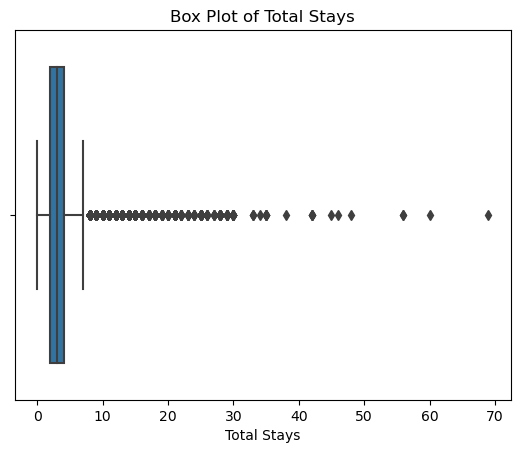

In [40]:
import seaborn as sns

sns.boxplot(x=df3['total_stays'])
plt.xlabel('Total Stays')
plt.title('Box Plot of Total Stays')
plt.show()


**Criteria for grouping total_stays:**
- Short Stay: 0-2 Nights
- Medium Stay: 3-7 Nights
- Long Stay: 8-14 Nights
- Extended Stay: 15+ Nights

The chosen categories of "Short Stay," "Medium Stay," "Long Stay," and "Extended Stay" are based on the distribution of stay durations within the dataset. These categories were determined by considering quartiles or other statistical measures that divide the data into meaningful groups. This approach ensures that each category contains a sufficient number of observations for reliable analysis. As a result, the selected categories are not only easy to understand but also grounded in the data's distribution of stay durations.

In [41]:
duration_list = []
for i in df3['total_stays']:
    if i >= 0 and i <= 2:
        group = 'Short Stay'  # Represents 0-2 Nights
    elif i >= 3 and i <= 7:
        group = 'Medium Stay'  # Represents 3-4 Nights
    elif i >= 8 and i <= 14:
        group = 'Long Stay'  # Represents 5-6 Nights
    else:
        group = 'Extended Stay'  
    duration_list.append(group)
df3['stays_duration_category'] = duration_list

df3.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays,stays_duration_category
25841,Resort Hotel,0,6,2018,September,29,13,0,1,2,...,270.0,0,Personal,73.00,0,1,Check-Out,2.0,1,Short Stay
19509,Resort Hotel,0,13,2017,February,52,22,0,3,2,...,0.0,0,Personal,59.85,0,0,Check-Out,2.0,3,Medium Stay


In [42]:
df3['stays_duration_category'].value_counts()

Medium Stay      64546
Short Stay       49221
Long Stay         4790
Extended Stay      429
Name: stays_duration_category, dtype: int64

### 3. Create an Aggregated Table

In [43]:
# Grouping the data to calculate cancel rate based on hotel type and duration
df_cancel = df3.groupby(['hotel', 'stays_duration_category','is_canceled'])['stays_duration_category'].count().reset_index(name='num_booking')

# Calculate total_booking
df_tb = df_cancel.groupby(['hotel', 'stays_duration_category'])['num_booking'].sum().reset_index(name='total_booking')

# Merged table
df_merge = df_cancel.merge(df_tb, on=["hotel", "stays_duration_category"])
df_merge

,hotel,stays_duration_category,is_canceled,num_booking,total_booking
0,City Hotel,Extended Stay,0,35,152
1,City Hotel,Extended Stay,1,117,152
2,City Hotel,Long Stay,0,508,1063
3,City Hotel,Long Stay,1,555,1063
4,City Hotel,Medium Stay,0,25059,42849
5,City Hotel,Medium Stay,1,17790,42849
6,City Hotel,Short Stay,0,20343,34876
7,City Hotel,Short Stay,1,14533,34876
8,Resort Hotel,Extended Stay,0,152,277
9,Resort Hotel,Extended Stay,1,125,277


In [44]:
# Calculate cancel ratio
df_merge['cancel_ratio']=round(df_merge['num_booking']/df_merge['total_booking']*100,1)

# sort value
sorter = ["Short Stay", "Medium Stay", "Long Stay", "Extended Stay"]
df_merge["stays_duration_category"] = pd.Categorical(df_merge["stays_duration_category"], 
                                          categories=sorter, 
                                          ordered=True)

df_merge.sort_values("stays_duration_category", inplace=True)
df_merge.reset_index(drop=True, inplace=True)

df_merge

,hotel,stays_duration_category,is_canceled,num_booking,total_booking,cancel_ratio
0,City Hotel,Short Stay,0,20343,34876,58.3
1,City Hotel,Short Stay,1,14533,34876,41.7
2,Resort Hotel,Short Stay,0,11438,14345,79.7
3,Resort Hotel,Short Stay,1,2907,14345,20.3
4,City Hotel,Medium Stay,0,25059,42849,58.5
5,City Hotel,Medium Stay,1,17790,42849,41.5
6,Resort Hotel,Medium Stay,0,14687,21697,67.7
7,Resort Hotel,Medium Stay,1,7010,21697,32.3
8,City Hotel,Long Stay,0,508,1063,47.8
9,City Hotel,Long Stay,1,555,1063,52.2


In [45]:
#pick the data that hotels has been cancelled
df_final = df_merge[df_merge['is_canceled']==1].sort_values('stays_duration_category', ascending=True)
df_final

,hotel,stays_duration_category,is_canceled,num_booking,total_booking,cancel_ratio
1,City Hotel,Short Stay,1,14533,34876,41.7
3,Resort Hotel,Short Stay,1,2907,14345,20.3
5,City Hotel,Medium Stay,1,17790,42849,41.5
7,Resort Hotel,Medium Stay,1,7010,21697,32.3
9,City Hotel,Long Stay,1,555,1063,52.2
11,Resort Hotel,Long Stay,1,1078,3727,28.9
13,City Hotel,Extended Stay,1,117,152,77.0
15,Resort Hotel,Extended Stay,1,125,277,45.1


### 4. Data Visualization

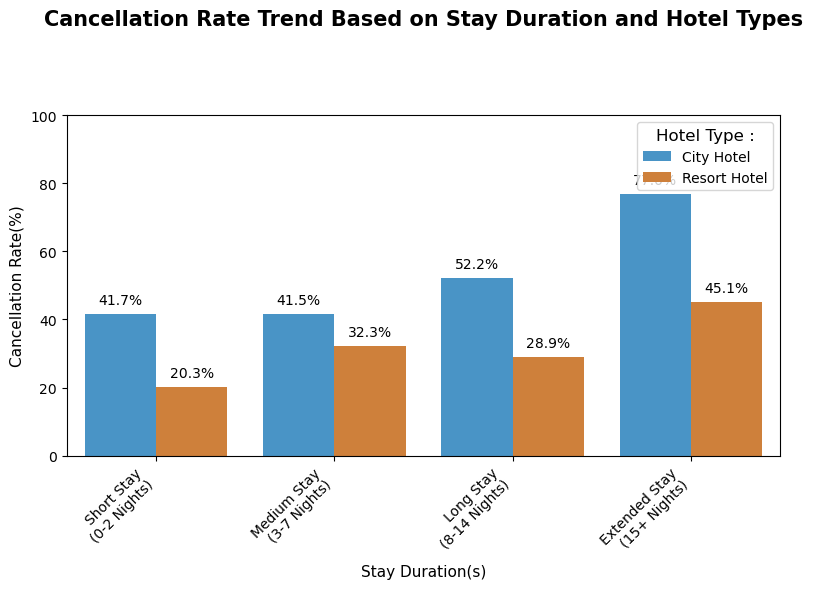

In [47]:
# Set figure & size
fig, ax = plt.subplots(figsize=(8, 6))

color = ['#3498db', '#e67e22']
city_hotel = df_final[df_final['hotel'] == 'City Hotel']
resort_hotel = df_final[df_final['hotel'] == 'Resort Hotel']

# Create bar plot and regression plot
sns.barplot(x='stays_duration_category', y='cancel_ratio', 
            data=df_final, hue='hotel', palette=color)

# Add labels to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Stay Duration and Hotel Types", 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})

# Set axis limits
plt.ylim(0, 100)

# Set custom y-axis labels
custom_labels = ['Short Stay\n(0-2 Nights)', 'Medium Stay\n(3-7 Nights)', 
                 'Long Stay\n(8-14 Nights)', 'Extended Stay\n(15+ Nights)']

plt.xticks(ticks=np.arange(0, len(df_final['stays_duration_category'].unique())),
           labels=custom_labels, rotation=45, ha='right')

# sns.despine() # # to hide lines on the outside of the axis (top and right)
plt.tight_layout()
plt.show()


### 5. Intepretation

- Based on the above plot, it is evident that city hotels experience more cancellations compared to resort hotels.
- For city hotels, there is a positive trend. The longer the duration of stay, the higher the cancellation rate. As seen in the plot, customers categorized as "extended stay" (stays longer than 15 nights) exhibit a cancellation rate of 77%.
- A similar pattern is observed for resort hotels, where the most cancellations occur in the "extended stay" category.
- These insights suggest that the duration of stay plays a significant role in influencing the likelihood of booking cancellations for both city and resort hotels.

# Task 4 - Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate:
1. Create a new column containing categorization based on the lead time column (Hint: Pay attention to the intervals when creating categorization).
2. Generate an aggregated table displaying the comparison of the number of hotel bookings canceled against lead time for each hotel type (Hint: Consider the proportion of canceled bookings).
3. Create a plot illustrating the cancellation ratio of reservations against lead time for each hotel type (Hint: Choose an appropriate plot type).
4. Provide an interpretation of the plot's outcomes in the preceding step (Hint: Analyze the impact of lead time intervals).

### 1. Create Categorization based on Lead Time

In [64]:
df4 = df3.copy()
df4.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays,stays_duration_category
106628,City Hotel,0,0,2019,April,9,28,0,0,1,...,0.0,0,Personal,0.00,0,0,Check-Out,1.0,0,Short Stay
57287,City Hotel,1,184,2018,November,39,22,2,3,2,...,0.0,0,Personal,137.28,0,0,Canceled,2.0,5,Medium Stay


In [72]:
unique_val = df4['lead_time'].nunique()
min_val = df4['lead_time'].min()
max_val = df4['lead_time'].max()

print("Unique Value:", unique_val)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

Unique Value: 479
Minimum Value: 0
Maximum Value: 737


In [73]:
df4['lead_time'].describe()

count    118986.000000
mean        104.069773
std         106.890899
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

<Axes: xlabel='lead_time', ylabel='Count'>

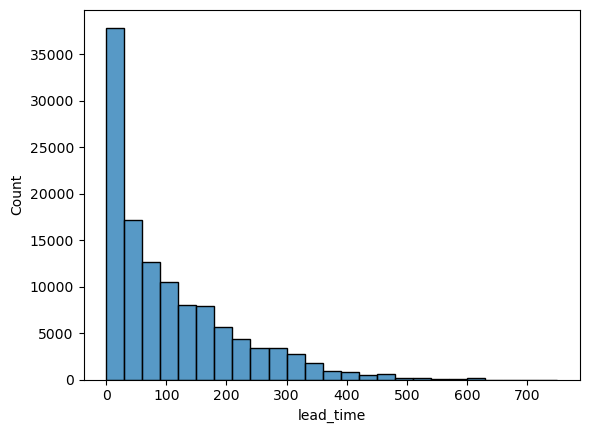

In [74]:
sns.histplot(x='lead_time', data=df4, binwidth=30)

To facilitate analysis, the lead_time data will be divided into several categories.
- 1 week: Lead time <= 7 days
- 1 month: 7 days < Lead time <= 30 days
- 3 months: 30 days < Lead time <= 90 days
- 6 months: 90 days < Lead time <= 180 days
- 1 year: 180 days < Lead time <= 365 days
- More than 1 year (>1 year): Lead time > 365 days

In [75]:
duration_list = []
for i in df4['lead_time']:
    if i <= 7:
        group = '1 week'
    elif 8 <= i <= 30:
        group = '1 month'
    elif 31 <= i <= 90:
        group = '3 months'
    elif 91 <= i <= 180:
        group = '6 months'
    elif 181 <= i <= 365:
        group = '1 year'
    else:
        group = '> 1 year'
    duration_list.append(group)

df4['lead_time_category'] = duration_list
df4.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays,stays_duration_category,lead_time_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,Personal,0.0,0,0,Check-Out,2.0,0,Short Stay,1 year
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,Personal,0.0,0,0,Check-Out,2.0,0,Short Stay,> 1 year


In [76]:
df4['lead_time_category'].value_counts()

3 months    29475
6 months    26366
1 year      21464
1 week      19617
1 month     18918
> 1 year     3146
Name: lead_time_category, dtype: int64

### 2. Aggregated Table for Cancellation Comparison

In [80]:
# Grouping the data to calculate cancel rate based on hotel type and lead time category
df_cancel2 = df4.groupby(['hotel', 'lead_time_category','is_canceled'])['lead_time_category'].count().reset_index(name='num_booking')

# Calculate total_booking
df_total_booking = df_cancel2.groupby(['hotel', 'lead_time_category'])['num_booking'].sum().reset_index(name='total_booking')

# Merged table
df_merged2 = df_cancel2.merge(df_total_booking, on=["hotel", "lead_time_category"])
df_merged2


,hotel,lead_time_category,is_canceled,num_booking,total_booking
0,City Hotel,1 month,0,8645,12514
1,City Hotel,1 month,1,3869,12514
2,City Hotel,1 week,0,9383,10685
3,City Hotel,1 week,1,1302,10685
4,City Hotel,1 year,0,5270,14165
5,City Hotel,1 year,1,8895,14165
6,City Hotel,3 months,0,12438,20722
7,City Hotel,3 months,1,8284,20722
8,City Hotel,6 months,0,9428,18152
9,City Hotel,6 months,1,8724,18152


In [83]:
# Calculate cancel ratio
df_merged2['cancel_ratio']=round(df_merged2['num_booking']/df_merged2['total_booking']*100,2)

# sort value
sorter = ["1 week", "1 month", "3 months", "6 months", "1 year", "> 1 year"]
df_merged2["lead_time_category"] = pd.Categorical(df_merged2["lead_time_category"], 
                                          categories=sorter, 
                                          ordered=True)

df_merged2.sort_values("lead_time_category", inplace=True)
df_merged2.reset_index(drop=True, inplace=True)

df_merged2

,hotel,lead_time_category,is_canceled,num_booking,total_booking,cancel_ratio
0,City Hotel,1 week,0,9383,10685,87.81
1,City Hotel,1 week,1,1302,10685,12.19
2,Resort Hotel,1 week,1,581,8932,6.50
3,Resort Hotel,1 week,0,8351,8932,93.50
4,City Hotel,1 month,0,8645,12514,69.08
5,City Hotel,1 month,1,3869,12514,30.92
6,Resort Hotel,1 month,1,1403,6404,21.91
7,Resort Hotel,1 month,0,5001,6404,78.09
8,City Hotel,3 months,1,8284,20722,39.98
9,City Hotel,3 months,0,12438,20722,60.02


In [84]:
df_final2 = df_merged2[df_merged2['is_canceled']==1].sort_values('lead_time_category', ascending=True)
df_final2

,hotel,lead_time_category,is_canceled,num_booking,total_booking,cancel_ratio
1,City Hotel,1 week,1,1302,10685,12.19
2,Resort Hotel,1 week,1,581,8932,6.50
5,City Hotel,1 month,1,3869,12514,30.92
6,Resort Hotel,1 month,1,1403,6404,21.91
8,City Hotel,3 months,1,8284,20722,39.98
11,Resort Hotel,3 months,1,2841,8753,32.46
12,Resort Hotel,6 months,1,3075,8214,37.44
15,City Hotel,6 months,1,8724,18152,48.06
16,City Hotel,1 year,1,8895,14165,62.80
19,Resort Hotel,1 year,1,3013,7299,41.28


### 3. Cancellation Ratio Plot

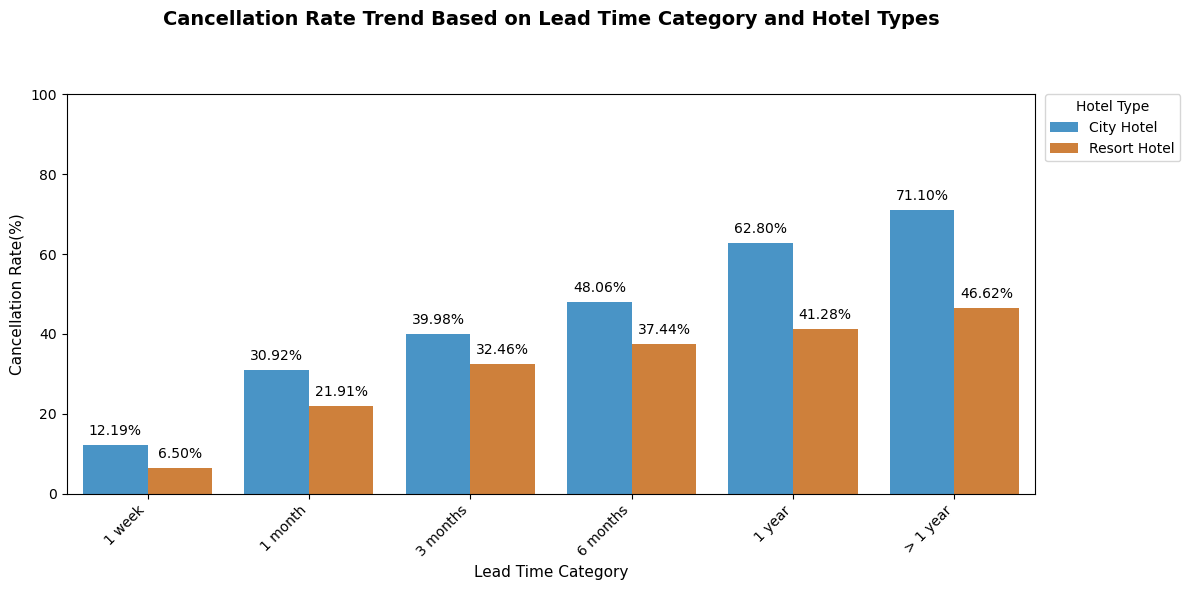

In [89]:
# Set figure & size
fig, ax = plt.subplots(figsize=(12, 6))

# Define color palette for different hotel types
color = ['#3498db', '#e67e22']

# Create bar plot and line plot using seaborn
sns.barplot(x='lead_time_category', y='cancel_ratio', 
            data=df_final2, hue='hotel', palette=color)

# Add labels to the bar plot with formatted cancellation rates
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Lead Time Category and Hotel Types", 
          fontsize=14, color='black', weight='bold', pad=50)
plt.xlabel('Lead Time Category', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.legend(title="Hotel Type",
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0)

# Set axis limits
plt.ylim(0, 100)

# Set custom x-axis labels
custom_labels = ['1 week', '1 month', '3 months',
                 '6 months', '1 year', '> 1 year']

plt.xticks(ticks=np.arange(0, len(df_final2['lead_time_category'].unique())),
           labels=custom_labels, rotation=45, ha='right')

# sns.despine() # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

# Display the plot
plt.show()


### 4. Interpretation

- **1 week Lead Time Category:** Both City Hotels and Resort Hotels experience relatively low cancellation ratios, with City Hotels at around 12.19% and Resort Hotels at 6.50%. This indicates that guests who book within a week of their stay are more likely to follow through with their reservations.

- **1 month Lead Time Category:** The cancellation ratios increase for both hotel types in this category. City Hotels witness a higher cancellation ratio of around 30.92%, while Resort Hotels have a slightly lower ratio of 21.91%. This suggests that guests who book a month in advance might be more likely to change their plans.

- **3 months Lead Time Category:** The cancellation ratios continue to vary between City and Resort Hotels. City Hotels have a higher cancellation ratio of around 39.98%, while Resort Hotels see a higher ratio of 32.46%. This could imply that guests who book further in advance might be more uncertain about their plans.

- **6 months Lead Time Category:** For this category, City Hotels experience a notably higher cancellation ratio of about 48.06%, compared to Resort Hotels with a ratio of 37.44%. This indicates that guests who book very early might have a higher chance of canceling their reservations.

- **1 year Lead Time Category:** City Hotels see a significant spike in their cancellation ratio, reaching approximately 62.80%, while Resort Hotels also experience an increase with a ratio of 41.28%. This suggests that extremely early bookings may carry a higher risk of cancellations, particularly for City Hotels.

- **> 1 year Lead Time Category:** The cancellation ratios remain high for both hotel types, with City Hotels at around 71.10% and Resort Hotels at 46.62%. This indicates that guests who make bookings well in advance, beyond a year, are more likely to cancel.